<b><big><big> ML House Challenge </big></big></b>

# Load The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Consider the **Houses dataset** we used in the previous lecture ([download here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv)) <br>
    ℹ️ Full dataset description [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt)

In [2]:
!curl -s -L "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv" > house.csv

In [3]:
data = pd.read_csv("house.csv")

In [4]:
columns = [
    "WallMat",
    "Alley",
    "Pesos",
    "GrLivArea",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "OverallCond",
    "Street",
    "SalePrice"
]
data = data[columns]
data.head()

,WallMat,Alley,Pesos,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Street,SalePrice
0,Concrete,NaN,4170000.0,1710,3,1,5,Pave,208500
1,Wood,NaN,3630000.0,1262,3,1,8,Pave,181500
2,Wood,NaN,4470000.0,1786,3,1,5,Pave,223500
3,Concrete,NaN,2800000.0,1717,3,1,5,Pave,140000
4,Concrete,NaN,5000000.0,2198,4,1,5,Pave,250000


# Duplicates

We can first check <b><i>how many duplicates</i></b> there are with **<mark>pandas.DataFrame.duplicated</mark>**

In [5]:
data.duplicated().sum()

303

In [6]:
len(data)

1760

In [7]:
data.duplicated().sum()/len(data)

0.1721590909090909

Now we can <i><b>delete duplicates</i></b> with **<mark>pandas.DataFrame.drop_duplicates</mark>**

In [8]:
data.drop_duplicates(inplace=True)
len(data)

1457

# Missing Data

💻 Detecting missing data with **<mark>pandas.DataFrame.isnull</mark>**

In [9]:
data.isnull().sum()/len(data)

WallMat         0.996568
Alley           0.938229
Pesos           0.006863
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
Street          0.000000
SalePrice       0.000000
dtype: float64

## Handling missing data

How you handle missing values will differ from field to field and dataset to dataset?

   * What might have caused the missing values?
   * Do the missing values represent a particular story or event?
   * Can I replace them by another value?
   * Can I afford to lose any data?

### WallMat

In [10]:
data.WallMat.unique()

array(['Concrete', 'Wood', nan], dtype=object)

In [11]:
data.drop(columns="WallMat",inplace=True)


In [12]:
data.columns

Index(['Alley', 'Pesos', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'OverallCond', 'Street', 'SalePrice'],
      dtype='object')

### Alley

In [13]:
data.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [14]:
data.Alley.replace(np.nan,"NoAlley",inplace=True)
data.Alley.unique()

array(['NoAlley', 'Grvl', 'Pave'], dtype=object)

### Pesos

In [15]:

(data.Pesos.isnull().sum()/len(data))*100 # Percentage of missing values in Pesos


data.dropna(subset=['Pesos']) # Option 1: Drop rows where Pesos value is missing

data.Pesos.replace(np.nan, data.Pesos.mean()) # Option 2: Replace missing Pesos values with mean

0       4170000.0
1       3630000.0
2       4470000.0
3       2800000.0
4       5000000.0
          ...    
1455    3500000.0
1456    4200000.0
1457    5330000.0
1458    2842500.0
1459    2950000.0
Name: Pesos, Length: 1457, dtype: float64

## SimpleImputer

👉[Sklearn <mark>SimpleImputer()</mark> documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
simple_impute = SimpleImputer(strategy='mean')
simple_impute.fit(data[["Pesos"]])
data[["Pesos"]] = simple_impute.transform(data[["Pesos"]])

In [18]:
data.isnull().sum()

Alley           0
Pesos           0
GrLivArea       0
BedroomAbvGr    0
KitchenAbvGr    0
OverallCond     0
Street          0
SalePrice       0
dtype: int64

# Outliers

<b><big>Detecting Outliers - Boxplot</big><b>

We can use <b><mark>pandas.DataFrame.boxplot</mark></b> to easily visualize outliers within `GrLivArea`.

<AxesSubplot:>

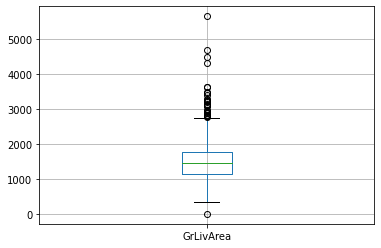

In [19]:
data[['GrLivArea']].boxplot()

In [20]:
data[['GrLivArea']].min()

GrLivArea   -1
dtype: int64

In [21]:
data.GrLivArea.argmin()

10

In [22]:
data.head(11)

,Alley,Pesos,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Street,SalePrice
0,NoAlley,4170000.0,1710,3,1,5,Pave,208500
1,NoAlley,3630000.0,1262,3,1,8,Pave,181500
2,NoAlley,4470000.0,1786,3,1,5,Pave,223500
3,NoAlley,2800000.0,1717,3,1,5,Pave,140000
4,NoAlley,5000000.0,2198,4,1,5,Pave,250000
5,NoAlley,2860000.0,1362,1,1,5,Pave,143000
6,NoAlley,6140000.0,1694,3,1,5,Pave,307000
7,NoAlley,4000000.0,2090,3,1,6,Pave,200000
8,NoAlley,2598000.0,1774,2,2,5,Pave,129900
9,NoAlley,2360000.0,1077,2,2,6,Pave,118000


In [23]:
data.drop(labels=data.GrLivArea.argmin(),inplace=True)
data.reset_index(drop=True,inplace=True)

In [24]:
data.head()

,Alley,Pesos,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Street,SalePrice
0,NoAlley,4170000.0,1710,3,1,5,Pave,208500
1,NoAlley,3630000.0,1262,3,1,8,Pave,181500
2,NoAlley,4470000.0,1786,3,1,5,Pave,223500
3,NoAlley,2800000.0,1717,3,1,5,Pave,140000
4,NoAlley,5000000.0,2198,4,1,5,Pave,250000


# Scaling

## Standardization

💻 Standard scaling `Pesos`

array([[<AxesSubplot:title={'center':'Pesos'}>]], dtype=object)

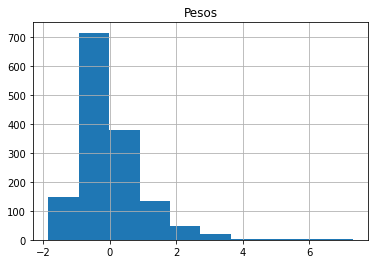

In [25]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
data.Pesos = s_scaler.fit_transform(data[["Pesos"]])
data[["Pesos"]].hist()

What if you're concerned with outliers? 🧐

## Robust Scaling

💻 Robust scaling `GrLivArea`

In [26]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() # Instanciate Robust Scaler

r_scaler.fit(data[['GrLivArea']]) # Fit scaler to feature

data['GrLivArea'] = r_scaler.transform(data[['GrLivArea']]) #Scale

<AxesSubplot:>

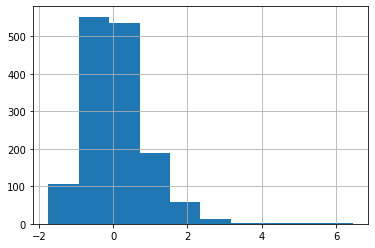

In [27]:
data['GrLivArea'].hist()

# Balancing

See Slides

# Encoding

Encode the column **`Alley`** with sklearn.preprocessing.**<mark>OneHotEncoder</mark>**

In [28]:
data.Alley.unique()

array(['NoAlley', 'Grvl', 'Pave'], dtype=object)

In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data.Alley.unique()  # Check unique values for streets (3)

ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(data[['Alley']]) # Fit encoder

alley_encoded = ohe.transform(data[['Alley']]) # Encode alley



In [30]:
alley_encoded.T

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
ohe.categories_

[array(['Grvl', 'NoAlley', 'Pave'], dtype=object)]

In [32]:
data["Grvl"],data["NoAlley"],data['Pave'] = alley_encoded.T # Transpose encoded Alley back into dataframe

data.head()

,Alley,Pesos,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Street,SalePrice,Grvl,NoAlley,Pave
0,NoAlley,0.356032,0.377941,3,1,5,Pave,208500,0.0,1.0,0.0
1,NoAlley,0.013024,-0.313151,3,1,8,Pave,181500,0.0,1.0,0.0
2,NoAlley,0.546592,0.495179,3,1,5,Pave,223500,0.0,1.0,0.0
3,NoAlley,-0.514191,0.388739,3,1,5,Pave,140000,0.0,1.0,0.0
4,NoAlley,0.883247,1.130737,4,1,5,Pave,250000,0.0,1.0,0.0


Encode the column **`Street`** with sklearn.preprocessing.**<mark>OneHotEncoder</mark>**

⚠️ Careful with binary datas (check <mark>drop</mark> option `if_binary` in OHE)

In [33]:
data.Street.unique()
ohe_street = OneHotEncoder(sparse=False,drop='if_binary')
data.Street = ohe_street.fit_transform(data[["Street"]])


In [34]:
data.Street.unique()

array([1., 0.])

In [35]:
ohe_street.categories_

[array(['Grvl', 'Pave'], dtype=object)]

In [36]:
data.head()

,Alley,Pesos,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Street,SalePrice,Grvl,NoAlley,Pave
0,NoAlley,0.356032,0.377941,3,1,5,1.0,208500,0.0,1.0,0.0
1,NoAlley,0.013024,-0.313151,3,1,8,1.0,181500,0.0,1.0,0.0
2,NoAlley,0.546592,0.495179,3,1,5,1.0,223500,0.0,1.0,0.0
3,NoAlley,-0.514191,0.388739,3,1,5,1.0,140000,0.0,1.0,0.0
4,NoAlley,0.883247,1.130737,4,1,5,1.0,250000,0.0,1.0,0.0


In [37]:
data.drop(columns="Alley",inplace=True)

# Discretizing

Let's turn this dataset into a <mark>classification</mark> task, **Cheap** or **Expensive**, according to the mean

In [38]:
data['SalePriceBinary'] = pd.cut(x = data['SalePrice'],
                       bins=[data['SalePrice'].min()-1,
                             data['SalePrice'].mean(),
                             data['SalePrice'].max()+1], 
                       labels=['cheap', 'expensive'])

data.head()

,Pesos,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Street,SalePrice,Grvl,NoAlley,Pave,SalePriceBinary
0,0.356032,0.377941,3,1,5,1.0,208500,0.0,1.0,0.0,expensive
1,0.013024,-0.313151,3,1,8,1.0,181500,0.0,1.0,0.0,expensive
2,0.546592,0.495179,3,1,5,1.0,223500,0.0,1.0,0.0,expensive
3,-0.514191,0.388739,3,1,5,1.0,140000,0.0,1.0,0.0,cheap
4,0.883247,1.130737,4,1,5,1.0,250000,0.0,1.0,0.0,expensive


# Feature Creation

See Slides

# Feature Selection

## Feature Correlation

<AxesSubplot:>

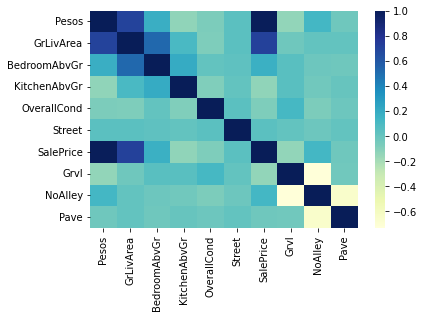

In [39]:
import seaborn as sns

# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [40]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
60,SalePrice,Pesos,0.990353
6,Pesos,SalePrice,0.990353
16,GrLivArea,SalePrice,0.708652
61,SalePrice,GrLivArea,0.708652
10,GrLivArea,Pesos,0.707766


In [41]:
data.drop(columns='Pesos',inplace=True)

## Modeling

In [42]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

target_encoder = LabelEncoder().fit(data['SalePriceBinary']) # Fit target encoder

y = target_encoder.transform(data['SalePriceBinary']) # ENCODE LABELS

X = data.drop(columns=['SalePrice', 'SalePriceBinary'])# Create feature set

log_reg = LogisticRegression(max_iter=10000) # Instanciate model

scores = cross_val_score(log_reg, X, y, cv=10) # Cross validate

scores.mean()

0.842687765706188

⚠️ Data Leakage

## Feature Permutation

In [43]:
from sklearn.inspection import permutation_importance

log_model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
0,GrLivArea,0.315659
1,BedroomAbvGr,0.036401
2,KitchenAbvGr,0.018956
6,NoAlley,0.008654
5,Grvl,0.004876
3,OverallCond,0.002198
4,Street,-0.000275
7,Pave,-0.000412


## Modeling v2

In [44]:
X = X.drop(columns=['Street', "Pave"]) # Drops weak features

log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X, y, cv=10)

scores.mean()

0.8433679735474728